# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [16]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [17]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [18]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

In [19]:
# Use seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the columns for numerical, categorical and text features
# Clothing ID should not be of interest
col_num_features = ['Age', 'Positive Feedback Count']
col_cat_features = ['Division Name', 'Department Name', 'Class Name']
col_text_features = ['Title', 'Review Text']


### Target value balance

In [20]:
# Determine if the target value 'Recommended IND' is balanced
perc_positive = data['Recommended IND'].sum()/data['Recommended IND'].size
print("Percentage of positive recommendations: " + str(perc_positive))

Percentage of positive recommendations: 0.8162346817048043


### Chi2 test

Unique Title percentage: 0.7126125149116148
Unique Review Text percentage: 0.9998373278386292


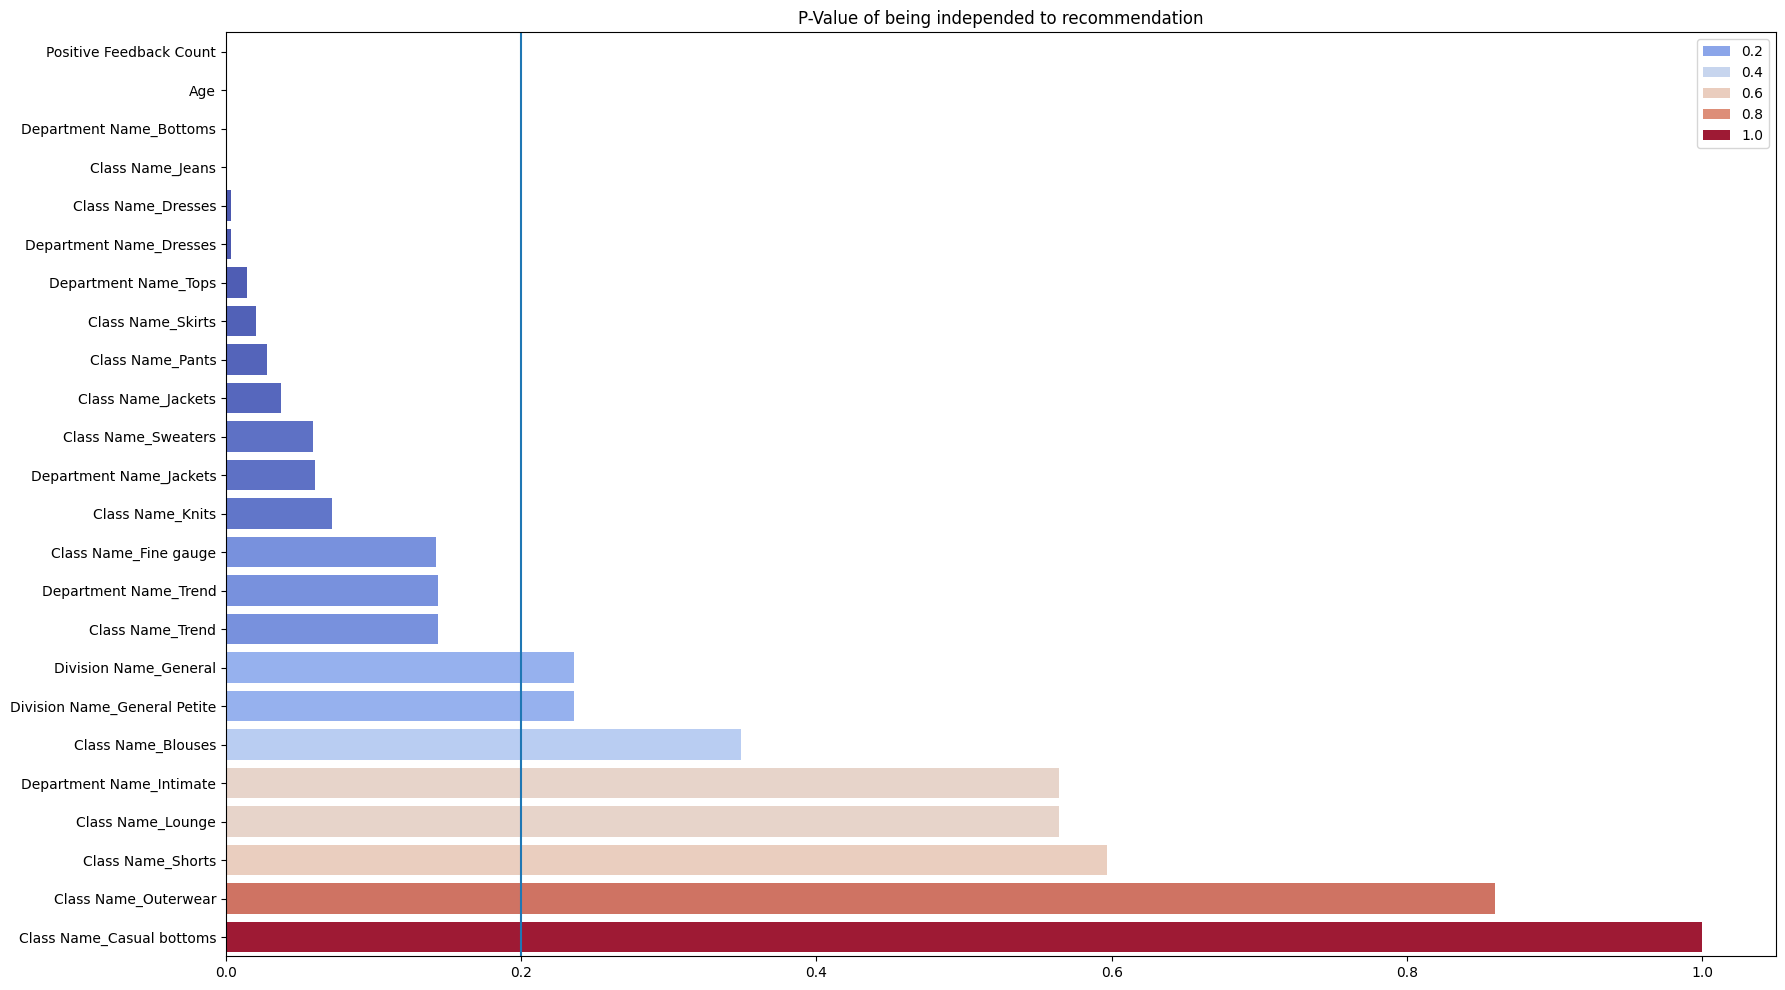

In [21]:
# Explore the percentage of unique titles and review texts
print( "Unique Title percentage: " + str(X['Title'].unique().shape[0]/X.shape[0]) )
print( "Unique Review Text percentage: " +  str(X['Review Text'].unique().shape[0]/X.shape[0]) )

# Do a chi2 test to see, what numerical and categorical variables are independent form the Recommendation
from sklearn.feature_selection import chi2
from scipy import stats

col_num_cat_features = ['Division Name', 'Department Name', 'Class Name', 'Age', 'Positive Feedback Count']
df_num_cat_features = pd.get_dummies(df[col_num_cat_features])
dummy_col_names = list(df_num_cat_features.columns)
df_chi2_with_recommendation = pd.DataFrame(np.zeros([df_num_cat_features.shape[1],1]), index=dummy_col_names, columns=(['p_value']))
for i, icol in enumerate(dummy_col_names):
    mycrosstab=pd.crosstab(df_num_cat_features[icol], data['Recommended IND'])
    stat,p,dof,expected = stats.chi2_contingency(mycrosstab)
    df_chi2_with_recommendation.iloc[i,0]=p

df_chi2_with_recommendation = df_chi2_with_recommendation.sort_values(by='p_value', ascending=True)
fig=plt.figure(figsize=(20,12), facecolor='w', edgecolor='k')
sns.barplot(x=df_chi2_with_recommendation['p_value'].values, y=df_chi2_with_recommendation.index, palette="coolwarm", hue=df_chi2_with_recommendation['p_value'].values)
plt.axvline(0.2) # Add line to display the 0.20 p value
plt.title('P-Value of being independed to recommendation');
plt.ylabel('');
plt.show()

### Summary

The following was noticed:
- There are no missing values
- Positive recommendations have a percentage of more than 80% of the dataset
- Some categories (e.g. Class Name_Casual_bottoms) do not seem to significantly relate to the recommendation. We can drop them to achieve a better learning transfer to the test data
- Textual features were not explored in detail, though it appears, that only 70% of the titles are unique, while the review texts are almost all unique.

This leads to the following development choices:
- The imbalanced classes in the dataset are handled by using class weights in the prediction model.
- We drop every feature that has a p-value above 0.2. This means, they are at more than 80% chance to be unrelated to the recommendation (not done in this work)
- As there are no missing values, an imputer is not required. It could be required later, though.


## Building Pipeline

In [22]:
from sklearn.pipeline import Pipeline

### Numerical and categorical pipelines

In [159]:
# Numerical pipeline
from sklearn.preprocessing import MinMaxScaler
num_pipeline = Pipeline([('scaler', MinMaxScaler())])

# Categorical pipeline
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))])




### Textual pipelines

Two feature generation pipelines are implemented
- Vectorization (after lemmatization)
- Token counter ('!', '?' and ' ')

#### Vectorization

In [160]:
# Vectorization with the TfidfVectorizer after lemmatization and reshaping
# Download and import spacy
# ! python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load('en_core_web_sm')

# Custom spacy lemmatizer
from sklearn.base import BaseEstimator, TransformerMixin
class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y=None):
        self._is_fitted = True
        return self

    def transform(self, X):
        lemmatized = [' '.join(token.lemma_ for token in doc if not token.is_stop) for doc in self.nlp.pipe(X)]
        return lemmatized   
    
    def __sklearn_is_fitted__(self):
        return hasattr(self, "_is_fitted") and self._is_fitted

# Build the pipeline for vectorization
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization_pipeline = Pipeline([
    ('dimension_reshaper', FunctionTransformer(np.reshape, kw_args={'newshape':-1})),
    ('lemmatizer', SpacyLemmatizer(nlp=nlp) ),
    ('tfidf_vectorizer', TfidfVectorizer(stop_words='english'))
])



#### Character counter

In [161]:
# Count the tokens '!', '?' and ' '
class CharacterCounter(BaseEstimator, TransformerMixin):
    def __init__(self, character: str):
        self.character = character

    def fit(self, X, y=None):
        self._is_fitted = True
        return self

    def transform(self, X):
        return [[text.count(self.character)] for text in X]
    
    def __sklearn_is_fitted__(self):
        return hasattr(self, "_is_fitted") and self._is_fitted

# Build the pipeline to count '!', '?', ' ' for emotionality and text size
from sklearn.pipeline import FeatureUnion
character_counter_pipeline = Pipeline([
    ('dimension_reshaper', FunctionTransformer(np.reshape, kw_args={'newshape':-1})),
    ('character_counter', FeatureUnion([
        ('count_spaces', CharacterCounter(character=' ')),
        ('count_exclamations', CharacterCounter(character='!')),
        ('count_question_marks', CharacterCounter(character='?'))
    ])
    )
])

### Merge pipelines into feature_engineering pipeline

In [162]:
# Combine the pipelines to a feature engineering pipeline
from sklearn.compose import ColumnTransformer

feature_engineering = ColumnTransformer([
        ('num', num_pipeline, col_num_features),
        ('cat', cat_pipeline, col_cat_features),
        ('character_counts_title', character_counter_pipeline, ["Title"]),
        ('character_counts_text', character_counter_pipeline, ["Review Text"]), 
        ('title_vectorization_title', vectorization_pipeline, ["Title"]),
        #('text_vectorization_text', vectorization_pipeline, ["Review Text"]) # Considering the text seemed to be too much complexity
])
feature_engineering

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Age', 'Positive Feedback Count']),
                                ('cat',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Division Name', 'Department Name',
                                  'Class Name']),
                                ('character_counts_title',
                                 Pipeline(steps=[('dimension_reshaper',
                                                  FunctionTransformer(func=<function resha...
                                                                                  CharacterCounter(character='?'))]))]),
                                 ['Review Text']),
                                ('title_vectorization_title',
                                 Pipeline(steps=[('dimension_reshaper',
                                                  FunctionTransformer(func=<function reshape at 0x000001B3B02D2E30>,
                                                                      kw_args={'newshape': -1})),
                                                 ('lemmatizer',
                                                  SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x000001B41C7CB290>)),
                                                 ('tfidf_vectorizer',
                                                  TfidfVectorizer(stop_words='english'))]),
                                 ['Title'])])

## Training Pipeline

In [200]:
# Calculate weights to compensate for the class imbalance
from sklearn.utils.class_weight import compute_sample_weight
weights = compute_sample_weight(class_weight="balanced", y=y_train)

In [212]:
# Train model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Calcul

model_pipeline = make_pipeline(feature_engineering, RandomForestClassifier(random_state=42,
                                n_estimators = 100,
                                max_features="sqrt", 
                                max_depth=50, 
                                min_samples_split = 2,
                                class_weight='balanced') # Use balanced weigths to compensate for class imbalance in the dataset
                               )

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age',
                                                   'Positive Feedback Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Division Name',
                                                   'Department Name',
                                                   'Class Name']),
                                                 ('character_counts_title',
                                                  Pipeline(steps=[('dimension_reshaper',
                                                                   Fu...
                                                                   FunctionTransformer(func=<function reshape at 0x000001B3B02D2E30>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x000001B41C7CB290>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  ['Title'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=50,
                                        random_state=42))])

Accuracy_Train: 0.922227842902874
Accuracy_Test: 0.7658556043079378


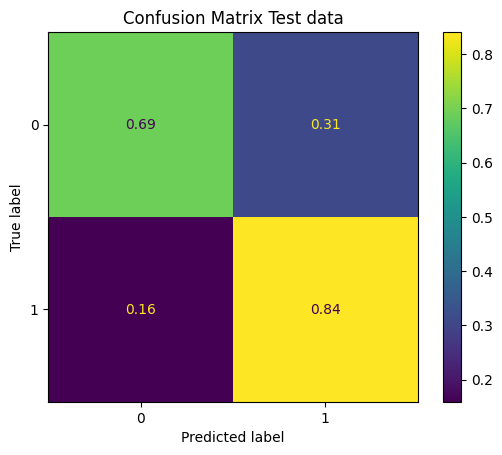

In [216]:
# Evaluate model
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Training performance
y_pred_train = model_pipeline.predict(X_train)
accuracy_pred_train= balanced_accuracy_score(y_train, y_pred_train)
# Test performance
y_pred_test = model_pipeline.predict(X_test) 
accuracy_pred_test= balanced_accuracy_score(y_test, y_pred_test)
print('Accuracy_Train:', accuracy_pred_train)
print('Accuracy_Test:', accuracy_pred_test)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, normalize='true')
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.title("Confusion Matrix Test data")
plt.show()

## Fine-Tuning

In [214]:
# Finetune the model parameters with a randomized search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
grid = dict(randomforestclassifier__n_estimators=[50, 100, 200, 300],
                    randomforestclassifier__max_depth = [10, 50, 100, None],
                    randomforestclassifier__min_samples_split = [2, 3, 4, 5]
                    #randomforestclassifier__class_weight=['balanced'] # Weighting the samples to balance the class disbalance
                    )


param_search = GridSearchCV(
    estimator=model_pipeline,
    scoring= 'balanced_accuracy', # Weighting the samples to balance the class disbalance
    param_grid=grid,
    cv=5,         # Use 2-fold cross-validation
    n_jobs=-1,    # Use all available processors (for multiprocessing)
    refit=True,   # Refit the model using the best parameters found
    verbose=3,    # Output of parameters, score, time
)
param_search.fit(X_train, y_train)

# Retrieve the best parameters and model
best_params = param_search.best_params_
model_best = param_search.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


Accuracy_Train_best: 0.9069234225223959
Accuracy_Test_best: 0.7756645030278855


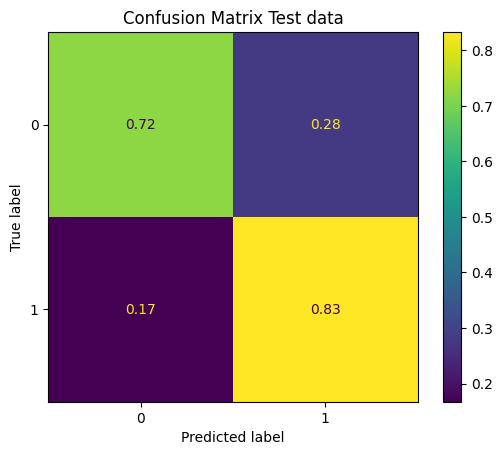

In [217]:
# Evaluate the best model
model_best = param_search.best_estimator_

# Training performance
y_pred_train = model_best.predict(X_train)
accuracy_pred_train= balanced_accuracy_score(y_train, y_pred_train)
# Test performance
y_pred_test = model_best.predict(X_test)
accuracy_pred_test= balanced_accuracy_score(y_test, y_pred_test)
print('Accuracy_Train_best:', accuracy_pred_train)
print('Accuracy_Test_best:', accuracy_pred_test)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, normalize='true')
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.title("Confusion Matrix Test data")
plt.show()

### Result

The inital model had a balanced accuracy of 0.77 and a bias to the class "1".

After finetuning the model, the balanced accuracy slightly increased to 0.78, while the bias was slightly reduced.

Increasing the search grid might further improve the results.